# Info

In [ ]:
!cat /proc/meminfo

MemTotal:       13294252 kB
MemFree:         9196424 kB
MemAvailable:   12441428 kB
Buffers:          214012 kB
Cached:          3223480 kB
SwapCached:            0 kB
Active:           455236 kB
Inactive:        3368368 kB
Active(anon):       1004 kB
Inactive(anon):   386416 kB
Active(file):     454232 kB
Inactive(file):  2981952 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:             32988 kB
Writeback:             0 kB
AnonPages:        385484 kB
Mapped:           278432 kB
Shmem:              1244 kB
KReclaimable:      99548 kB
Slab:             137676 kB
SReclaimable:      99548 kB
SUnreclaim:        38128 kB
KernelStack:        4448 kB
PageTables:         5768 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6647124 kB
Committed_AS:    1921764 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       73272 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs mmio_stale_data retbleed
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtua

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-440fc54c-8e1e-d19d-f2d0-4df57bbdad06)


# Libs + Utils

In [ ]:
import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 21.2 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 48.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 35.2 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910460 sha256=737ae327629f1d96bb6407280c7a173ff0813f46aa06b1266e1b7be979a4ed70
  Stored in directory: /root/.c

In [ ]:
import os
import sys
import time
import numpy as np
import scipy.io as sp
import networkx as nx
from torch_geometric.data import Data
import matplotlib.pyplot as plt

In [ ]:
sys.path.append("/content/")
from models import SageBase, SageRes
from utils import get_dataset, get_sample, rotate

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive/MyDrive/University/Courses/NAPDE-Project/data

Mounted at /gdrive
/gdrive/MyDrive/University/Courses/NAPDE-Project/data


In [ ]:
import os
from datetime import datetime
folder_name = datetime.today().strftime('%d%m%Y')
path = 'outputs/'+folder_name
if not os.path.isdir(path):
  os.mkdir(path)

In [ ]:
!cd datasets; ls

AdiacencyMatrices_voronoi.mat  mesh200	      timebenchmark  voro500
AdjacencyMatrices.mat	       mesh800	      tria200	     voro500_1000
AreaVectors.mat		       Meshsizes.mat  voro100	     voro50_2
AreaVectors_voronoi.mat        randtria200    voro100_1      voroSplit
CoordMatrices.mat	       squareOLD      voro150_1000   voroSub
CoordMatrices_voronoi.mat      test200	      voro50


In [ ]:
def get_dataset(dataset_name):

  # load
  adjacencies = np.squeeze(sp.loadmat('datasets/'+dataset_name+'/AdjacencyMatrices.mat')['AdjacencyMatrices'],0)
  coords = np.squeeze(sp.loadmat('datasets/'+dataset_name+'/CoordMatrices.mat')['CoordMatrices'],0)
  areas = np.squeeze(sp.loadmat('datasets/'+dataset_name+'/AreaVectors.mat')['AreaVectors'],0)
  print('Dataset loaded')

  # clean

  rmv_idx = []
  for k in range(adjacencies.shape[-1]):
    if(np.sum(adjacencies[k])==0):
      rmv_idx.append(k)

  adjacencies = np.delete(adjacencies, rmv_idx)
  coords = np.delete(coords, rmv_idx)
  areas = np.delete(areas, rmv_idx)

  dataset_size = adjacencies.shape[-1]

  dataset_size = areas.shape[-1]
  if(rmv_idx):
      print('Dataset cleaned: removed', len(rmv_idx), 'null-arrays')

  print('Name:\t\t', dataset_name)
  print('Dimensions:\t',adjacencies.shape, areas.shape, coords.shape)


  return adjacencies, coords, areas, dataset_size

In [ ]:
# Load Dataset
adjacencies, coords, areas, dataset_size = get_dataset('mesh800')
adjacencies_test, coords_test, areas_test, dataset_size_test = get_dataset('mesh200')

Dataset loaded
Dataset cleaned: removed 2 null-arrays
Name:		 mesh800
Dimensions:	 (798,) (798,) (798,)
Dataset loaded
Name:		 mesh200
Dimensions:	 (152,) (152,) (152,)


In [ ]:
def get_sample(adjacencies, coords, areas,i,randomRotate=False, selfloop=False, returnAll=False):

  coords_sample = torch.tensor(coords[i],dtype=torch.float)
  areas_sample = torch.tensor(areas[i],dtype=torch.float)

  if randomRotate:
    theta = torch.tensor(torch.randn(1)*torch.pi)
    #theta = torch.tensor(np.random.choice(np.array([torch.pi/2,0]),1),dtype=torch.float)
    R = torch.tensor([[torch.cos(theta),-torch.sin(theta)],[torch.sin(theta),torch.cos(theta)]])
    coords_rot = torch.matmul(R,coords_sample.t()).t()
    coords_sample = coords_rot

  x = torch.cat([coords_sample,areas_sample],-1)


  A = torch.tensor(adjacencies[i])+torch.eye(adjacencies[i].shape[0]) if selfloop else torch.tensor(adjacencies[i])
  edge_index = (A > 0).nonzero().t()

  data = Data(x=x, edge_index=edge_index)
  if returnAll:
    return data, A, x
  else:
    return data

In [ ]:
def rotate(coords):
    max_coords = (torch.max(coords,0)).values
    min_coords = (torch.min(coords,0)).values
    print(max_coords.shape)
    print(min_coords.shape)
    if((max_coords[1]-min_coords[1])>(max_coords[0]-min_coords[0])):
        theta = torch.tensor(torch.pi/2)
        R = torch.tensor([[torch.cos(theta),-torch.sin(theta)],[torch.sin(theta),torch.cos(theta)]])
        coords = torch.matmul(R,coords.t()).t()
    return coords

# Models

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv

class SageBase(torch.nn.Module):
    def __init__(self, hidden_units, lin_hidden_units, num_features, out_classes):
        super().__init__()

        self.conv1 = SAGEConv(num_features, hidden_units,aggr='mean')
        self.conv2 = SAGEConv(hidden_units, hidden_units,aggr='mean')
        self.conv3 = SAGEConv(hidden_units, hidden_units,aggr='mean')
        self.conv4 = SAGEConv(hidden_units, hidden_units,aggr='mean')

        self.lin1 = nn.Linear(hidden_units, lin_hidden_units)
        self.lin2 = nn.Linear(lin_hidden_units, lin_hidden_units)
        self.lin_last = nn.Linear(lin_hidden_units, out_classes)

        self.act = torch.tanh

    def normalize(self,x):
        coords_sample = x[:,:2]
        areas_sample = x[:,-1].unsqueeze(-1)

        max_coords = (torch.max(coords_sample,0)).values
        min_coords = (torch.min(coords_sample,0)).values

        if((max_coords[1]-min_coords[1])>(max_coords[0]-min_coords[0])):
            theta = torch.tensor(torch.pi/2).to(device)
            R = torch.tensor([[torch.cos(theta),-torch.sin(theta)],[torch.sin(theta),torch.cos(theta)]]).to(device)
            coords_sample = torch.matmul(R,coords_sample.t()).t()

        coords_sample = (coords_sample-torch.mean(coords_sample,0))/(torch.max(coords_sample,0)).values
        areas_sample = areas_sample/torch.max(areas_sample,0).values

        return torch.cat([coords_sample,areas_sample],-1)

    def forward(self, x, edge_index):

        x = self.normalize(x)

        x = self.act(self.conv1(x, edge_index))
        x = self.act(self.conv2(x, edge_index))
        x = self.act(self.conv3(x, edge_index))
        x = self.act(self.conv4(x, edge_index))

        x = self.act(self.lin1(x))
        x = self.act(self.lin2(x))
        x = self.lin_last(x)

        x = F.softmax(x,dim=1)

        return x

In [ ]:
models = [SageBase(16,16,3,2).to(device), SageBase(32,16,3,2).to(device), SageBase(32,32,3,2).to(device), SageBase(64,32,3,2).to(device)]

In [ ]:
from torch_geometric.utils import degree

def loss_normalized_cut (y , graph):
  d = degree(graph.edge_index[0], num_nodes=y.size(0))
  gamma = torch.t(y) @ d
  c = torch.sum(y[graph.edge_index[0], 0]*y[graph.edge_index[1], 1])
  return torch.sum(torch.div(c,gamma)).to(device)

In [ ]:
# Train
from sklearn.utils import shuffle
import random

epochs=100
batch_size=4

loss_array_ = []
loss_val_array_ = []
epoch_loss_array_ = []
epoch_loss_val_array_ = []
lr_array_ = []


for model_index, model in enumerate(models):

  modelname = model.__class__.__name__ + str(model_index)
  print(modelname)
  print('# parameters:',sum(p.numel() for p in model.parameters()))

  optimizer = torch.optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-5)
  scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',factor=0.5, patience=20, threshold=0.0001, threshold_mode='abs')

  loss_array = []
  loss_val_array = []
  epoch_loss_array = []
  epoch_loss_val_array = []
  lr_array = []

  start = time.time()

  for epoch in range(1, epochs+1):

      adjacencies_s, coords_s, areas_s = shuffle(adjacencies, coords, areas)
      adjacencies_test_s, coords_test_s, areas_test_s = shuffle(adjacencies_test, coords_test, areas_test)

      model.train()
      loss=torch.tensor([0.]).to(device)

      # Training
      for i in range(200):
        g = (get_sample(adjacencies, coords, areas,i,
                        randomRotate=False,selfloop=True)).to(device)
        out = model(g.x,g.edge_index)
        loss += loss_normalized_cut(out, g)

        if i%batch_size==0 or i==dataset_size-1:
          optimizer.zero_grad()
          loss_array.append(loss.item())
          loss.backward()
          optimizer.step()
          loss=torch.tensor([0.]).to(device)

      epoch_loss_array.append(sum(loss_array[-batch_size:])/batch_size)
      scheduler.step(loss_array[-1])
      lr_array.append(optimizer.param_groups[0]['lr'])

      # Validation
      model.eval()
      loss_val = torch.tensor([0.]).to(device)

      for i in range(dataset_size_test):
        g_val = (get_sample(adjacencies_test, coords_test, areas_test,i,
                            randomRotate=bool(random.getrandbits(1)),selfloop=True)).to(device)
        out_val = model(g_val.x,g_val.edge_index)
        loss_val += loss_normalized_cut(out_val, g_val)
        if i%batch_size==0 or i==dataset_size-1:
          loss_val_array.append(loss_val.item())
          loss_val = torch.tensor([0.]).to(device)
      epoch_loss_val_array.append(sum(loss_val_array[-batch_size:])/batch_size)

      print('epoch:', epoch,
            '\t\tloss:', round(epoch_loss_array[-1],5),
            '\t\tvalidation loss:', round(loss_val_array[-1],5),
            '\t\tlr:', optimizer.param_groups[0]['lr'])
  training_time = time.time()-start
  loss_array_.append(loss_array)
  loss_val_array_.append(loss_val_array)
  epoch_loss_array_.append(epoch_loss_array)
  epoch_loss_val_array_.append(epoch_loss_val_array)
  lr_array_.append(lr_array_)


SageBase0
# parameters: 2274


<ipython-input-13-b15e325a8fed>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta = torch.tensor(torch.randn(1)*torch.pi)


epoch: 1 		loss: 3.99834 		validation loss: 3.99914 		lr: 1e-05
epoch: 2 		loss: 3.99763 		validation loss: 3.99993 		lr: 1e-05
epoch: 3 		loss: 3.99669 		validation loss: 3.99987 		lr: 1e-05
epoch: 4 		loss: 3.99547 		validation loss: 3.99925 		lr: 1e-05
epoch: 5 		loss: 3.9939 		validation loss: 3.99976 		lr: 1e-05
epoch: 6 		loss: 3.99189 		validation loss: 3.99878 		lr: 1e-05
epoch: 7 		loss: 3.98937 		validation loss: 3.99884 		lr: 1e-05
epoch: 8 		loss: 3.98623 		validation loss: 3.99924 		lr: 1e-05
epoch: 9 		loss: 3.98236 		validation loss: 3.9982 		lr: 1e-05
epoch: 10 		loss: 3.97765 		validation loss: 3.99909 		lr: 1e-05
epoch: 11 		loss: 3.97199 		validation loss: 3.99883 		lr: 1e-05
epoch: 12 		loss: 3.96528 		validation loss: 3.97632 		lr: 1e-05
epoch: 13 		loss: 3.95746 		validation loss: 3.99529 		lr: 1e-05
epoch: 14 		loss: 3.94849 		validation loss: 3.99492 		lr: 1e-05
epoch: 15 		loss: 3.93834 		validation loss: 3.98633 		lr: 1e-05
epoch: 16 		loss: 3.92704 		validati

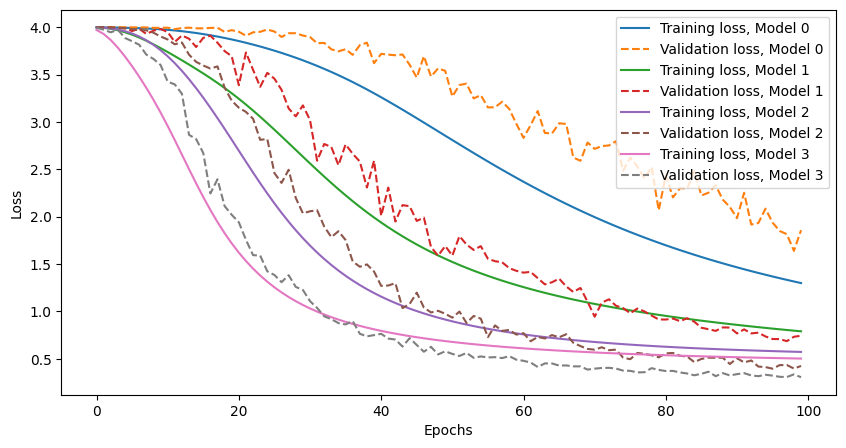

In [ ]:
plt.figure(figsize=(10,5))
i = 0
legend = []
for epoch_loss_array, epoch_loss_val_array in zip(epoch_loss_array_,epoch_loss_val_array_):
  plt.plot(epoch_loss_array)
  plt.plot(epoch_loss_val_array,'--')
  legend.append('Training loss, Model '+ str(i))
  legend.append('Validation loss, Model ' + str(i))
  i+=1
plt.legend(legend)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig(path+"/loss.png",dpi=300)